## 收集数据

In [3]:
'''
从三个来源收集数据：
1. 从Github repo中通过Python request库获得 
twitter-archive-enhanced.csv和 image-predictions.tsv两份文件存到本地
2. Tweepy获得扩展字段
'''

import requests
import os

urls=['https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/twitter-archive-enhanced.csv',
     'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv']

for url in urls:
    response = requests.get(url)
    with open(url.split('/')[-1], mode='wb') as file:
        file.write(response.content)


In [41]:
'''
通过tweepy抓一条测试tweet，看一下会返回哪些数据
'''

import tweepy
import json

consumer_key='jpFBZoGrKVA3AOb6cm1ayiTfB'
consumer_secret='CoAlS4FxWOIkSXkB4pUBmkthBRlnFwEf1UoUaVx589Z4UZX3Rs'
access_token='3147331141-d1OX1i4O8p18cTfKNkcsuru7dVgTH1sCiDs7Z7U'
access_secret='eT4B1mgEVprrhqUM3UoWxAsACLyAkhQZliQ89aTndLsOj'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#现在依然似懂非懂为什么我的全局代理依然需要写明了proxy的http的代理监听端口才能用
#似乎tweepy走http协议，而ss不代理http
api = tweepy.API(auth,proxy="127.0.0.1:1087")

test_tweet=api.get_status(1001124433577164800,tweet_mode='extended')
print(test_tweet)

with open('just_one_json.txt',mode='w') as file:
    json.dump(test_tweet._json,file) #只有_json模块适合写到文件里，目前对于json格式还是不足够了解

Status(_api=<tweepy.api.API object at 0x10f35ccf8>, _json={'created_at': 'Mon May 28 15:33:59 +0000 2018', 'id': 1001124433577164800, 'id_str': '1001124433577164800', 'full_text': 'CS专业是怎么毕业出这么多代码写得稀烂还自我感觉良好的小孩？一个思路，你们期末大作业可不可以像建筑系一样，请几个业界大佬来code review，看见不顺眼的当众往死里黑，骂到转系为止。#然后大佬们因为左花括号要不要换行打起来了', 'truncated': False, 'display_text_range': [0, 114], 'entities': {'hashtags': [{'text': '然后大佬们因为左花括号要不要换行打起来了', 'indices': [93, 114]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 45635727, 'id_str': '45635727', 'name': '消极', 'screen_name': 'cxiaoji', 'location': 'Seattle, WA', 'description': 'Designer. Geek. Data queen. Beer lover. Believes in the good in people. | 设计师里的码农，码农里的文青，文青里的NERD，NERD里的装逼犯。我妈她老人家教育我们说：凑合活着吧。| 别他妈

In [72]:
import tweepy
import json
from time import sleep

consumer_key='jpFBZoGrKVA3AOb6cm1ayiTfB'
consumer_secret='CoAlS4FxWOIkSXkB4pUBmkthBRlnFwEf1UoUaVx589Z4UZX3Rs'
access_token='3147331141-d1OX1i4O8p18cTfKNkcsuru7dVgTH1sCiDs7Z7U'
access_secret='eT4B1mgEVprrhqUM3UoWxAsACLyAkhQZliQ89aTndLsOj'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,proxy="127.0.0.1:1087")

'''
以下使用tweepy时间线循环向前抓tweet，该方法无法突破api获取3k2条推特的上限
参考资料：https://gist.github.com/yanofsky/5436496

all_tweets=[] #输出用户全部的tweets
all_needed_tweets=[]

#获得时间线上最新的20条
new_tweets = api.user_timeline(screen_name='dog_rates',tweet_mode='extended')
all_tweets.extend(new_tweets)
#print (len(new_tweets))
needed_parts=[[tweet._json] for tweet in new_tweets]
all_needed_tweets.extend(needed_parts)

recently_oldest_tweetid=new_tweets[-1].id-1 #当前最老的tweet_id

#根据当前最老的一条tweet_id作为max_id，20一组循环向前获得tweets
while len(new_tweets)>0:
    new_tweets = api.user_timeline(screen_name='dog_rates',max_id=recently_oldest_tweetid,tweet_mode='extended')
    all_tweets.extend(new_tweets)
    needed_parts=[[tweet._json] for tweet in new_tweets]
    all_needed_tweets.extend(needed_parts)
    recently_oldest_tweetid=all_tweets[-1].id-1
    print('%s tweets received'%len(all_tweets))
    sleep(1)
print (len(all_tweets))

#all_tweets定义为列表，mode用二进制文件w而不是比特流的wb，注意明确编码方式
#不能用文件方式把json写坏，所以……不明确编码方式也挺好的
with open('all_tweets_3k2_json.txt',mode='w') as file:
    json.dump(all_needed_tweets,file)
    #file.write(str(all_tweets))

'''
import pandas as pd
import math

df_id=pd.read_csv('twitter-archive-enhanced.csv')
#df_id.info()
ids=df_id.tweet_id
#print(int(len(ids)/100)) 此为向下取整
#print(math.ceil(len(ids)/100)) 此为向上取整


以下使用已有的tweet_id，通过api.statuses_lookup（一次不超过100条）批量获取

counter=0
all_id_tweets=[]


new_tweets=api.statuses_lookup(list(ids[0:100]))
print (len(ids[0:100]))
needed_parts=[[tweet._json] for tweet in new_tweets]
all_id_tweets.extend(needed_parts)
print(all_id_tweets)

#all_id_tweets.extend(new_tweets._json)

for counter in range(math.ceil(len(ids)/100)): #range范围不包括右括号
    id_subset=ids[(100*counter):(100*(counter+1))]
    #print(len(id_subset))
    new_tweets=api.statuses_lookup(list(id_subset))
    needed_parts=[[tweet._json] for tweet in new_tweets]
    all_id_tweets.extend(needed_parts)
    print('%s tweets received' %(100*counter+100))
    sleep(6)
    counter= counter+1

with open('tweet_json.txt',mode='w') as file:
    json.dump(all_id_tweets,file)
    #file.write(str(all_id_tweets)) #这样子写会把json文件写坏的，是给自己挖坑的



40 tweets received
60 tweets received
80 tweets received
100 tweets received
120 tweets received
140 tweets received
160 tweets received
180 tweets received
200 tweets received
220 tweets received
240 tweets received
260 tweets received
280 tweets received
300 tweets received
320 tweets received
340 tweets received
360 tweets received
380 tweets received
400 tweets received
420 tweets received
440 tweets received
460 tweets received
480 tweets received
500 tweets received
520 tweets received
540 tweets received
560 tweets received
580 tweets received
600 tweets received
620 tweets received
640 tweets received
660 tweets received
680 tweets received
700 tweets received
720 tweets received
740 tweets received
760 tweets received
780 tweets received
800 tweets received
820 tweets received
840 tweets received
860 tweets received
880 tweets received
900 tweets received
920 tweets received
940 tweets received
960 tweets received
980 tweets received
1000 tweets received
1020 tweets received
1

"\nimport pandas as pd\nimport math\nimport json\nfrom time import sleep\n\ndf_id=pd.read_csv('twitter-archive-enhanced.csv')\n#df_id.info()\nids=df_id.tweet_id\n#print(int(len(ids)/100)) 此为向下取整\n#print(math.ceil(len(ids)/100)) 此为向上取整\n\n\n以下使用已有的tweet_id，通过api.statuses_lookup（一次不超过100条）批量获取\n\ncounter=0\nall_id_tweets=[]\n\n\nnew_tweets=api.statuses_lookup(list(ids[0:100]))\nprint (len(ids[0:100]))\nneeded_parts=[[tweet._json] for tweet in new_tweets]\nall_id_tweets.extend(needed_parts)\nprint(all_id_tweets)\n\n#all_id_tweets.extend(new_tweets._json)\n\nfor counter in range(math.ceil(len(ids)/100)): #range范围不包括右括号\n    id_subset=ids[(100*counter):(100*(counter+1))]\n    #print(len(id_subset))\n    new_tweets=api.statuses_lookup(list(id_subset))\n    needed_parts=[[tweet._json] for tweet in new_tweets]\n    all_id_tweets.extend(needed_parts)\n    print('%s tweets received' %(100*counter+100))\n    sleep(6)\n    counter= counter+1\n\nwith open('all_tweets_givenid_json.txt',mode='w') as 

## 评估数据   
当前所拥有的文档：已有tweets基本信息的csv文件，已有的图像预测数据集tsv文件，通过tweepy获得的两个json文件   

从tweet_json.txt中提取：
- id, retweet_count,favorite_count   
并输出到’df_json.csv‘备用

In [218]:
import json
import re
import pandas as pd

with open('tweet_json.txt',mode='r') as load_file:
    data=json.load(load_file)

'''
#查看data[]的属性
print (type(data))
print (len(data))
print(type(data[0]))
print(len(data[0]))
#print(data[0])
'''
    
#构建df_json容纳id, retweet_count,favorite_count字段
df_json=pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])

re_count_way=re.compile(r'^(\d+)')
fav_count_way=re.compile(r'^(\d+)')


counter_json=0
for counter_json in range(len(data)):
    id_str=str(data[counter_json]).split('\'id\': ')
    retweet_str=str(data[counter_json]).split('\'retweet_count\': ')
    favorited_str=str(data[counter_json]).split('\'favorite_count\': ')
    
    #print(id_str[1][:18])
    re_count=re_count_way.match(retweet_str[1]).group()
    fav_count=fav_count_way.match(favorited_str[1]).group()
    #print(re_count)
    #print(fav_count)
    
    new_row={'tweet_id':id_str[1][:18],'retweet_count':re_count,'favorite_count':fav_count}
    df_json=df_json.append(new_row,ignore_index=True)#没有”df_json=“会出错的
    counter_json=counter_json+1

#df_json.info()
df_json.to_csv('df_json.csv')

'''
#没能找到最合适的挖出text模块的正则表达式
text_str=str(data[0]).split('\'text\': \'')
#print(text_str[1])
text_t=text_str[1].split('\', \'truncated')
print(text_t[0])

text_clean=re.match(r'^(\w*+)https',text_str[0])
text_clean.group(1)
'''


"\n#没能找到最合适的挖出text模块的正则表达式\ntext_str=str(data[0]).split(''text': '')\n#print(text_str[1])\ntext_t=text_str[1].split('', 'truncated')\nprint(text_t[0])\n\ntext_clean=re.match(r'^(\\w*+)https',text_str[0])\ntext_clean.group(1)\n"

In [33]:
'''
根据审阅建议：原来读取tweet_json.txt文件的方法太笨了。根本原因还是对json结构不熟悉所致
json数据拆开了就是list，的list，的dict
'''

import pandas as pd
import json

with open ('tweet_json.txt',mode='r') as file:  
    json_dict=json.load(file)
    
    num=0
    tweet_list=[]
    for num in range(len(json_dict)): 
        to_append= {
            'tweet_id':json_dict[num][0]['id'],
            'retweet_count':json_dict[num][0]['retweet_count'],
            'favorite_count':json_dict[num][0]['favorite_count']
        }
        tweet_list.append(to_append)
        num=num+1
print (len(tweet_list))
df_json=pd.DataFrame(tweet_list, columns=['tweet_id','retweet_count','favorite_count'])
df_json.to_csv('df_new_json.csv')

print ('Done')

'''

with open ('tweet_json.txt',mode='r') as f: 
    json_dict= json.loads(f.readline())
    print(type(json_dict[0]))
    print(len(json_dict[0]))
    print(json_dict[0][0]['id'])
    #print(json_dict[0]['favorite_count'])
'''

2345


"\n\nwith open ('tweet_json.txt',mode='r') as f: \n    json_dict= json.loads(f.readline())\n    print(type(json_dict[0]))\n    print(len(json_dict[0]))\n    print(json_dict[0][0]['id'])\n    #print(json_dict[0]['favorite_count'])\n"

In [63]:
import pandas as pd

enhanced=pd.read_csv('twitter-archive-enhanced.csv')
image=pd.read_csv('image-predictions.tsv',sep='\t')
json=pd.read_csv('df_json.csv',index_col=0) #唯独这个不追加一句的话会出现Unnamed:0列

enhanced.info()
image.info()
json.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [62]:
import numpy as np
#enhanced.sample(3)
#enhanced.retweeted_status_id.count()

#image.sample(5)
#json.sample(5)

#image.info()
#image.head(5)
#archive.tweet_id.order()
#json.sample(5)

#archive.puppo.value_counts()

#rating_denominator正常应为10，获得异常的数据index，手动对比到底是什么问题

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1005,747651430853525504,7.476487e+17,4.196984e+09,2016-06-28 04:42:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Other pupper asked not to have his identity sh...,NaN,NaN,NaN,NaN,12,10,None,None,None,pupper,None
1602,685973236358713344,NaN,NaN,2016-01-09 23:55:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lorelei. She's contemplating her exist...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685973236...,11,10,Lorelei,None,None,None,None
1434,697270446429966336,NaN,NaN,2016-02-10 04:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. He got stuck on his 3rd homew...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697270446...,10,10,Bentley,None,None,None,None


#### Tidiness   
- enhanced表中，doggo/floofer/pupper/puppo应合并为一列”stage“（狗狗的不同地位）的属性值
- enhanced表中,转发的推需要删除
- enhanced表中有用的列：tweet_id，timestamp，text，rating_numerator，rating_denominator，name，stage（需处理）
- image表中，取p1_dog/p2_dog/p3_dog中第一个为true的所对应的p名称作为p_species（狗狗的品种），均为False的视为品种未知取值'Unknown'
- image表中有用的列：tweet_id，p_species（需处理）
- enhanced,image,df_json三张表根据tweet_id合并到一起，没有图片预测对应的推应该删除
- （enhanced,image）合并后，与df_json中转推数和喜爱数合并


## 清理数据   

#### Tideness
- enhanced表中，doggo/floofer/pupper/puppo合并为一列'stage',原列名视为属性值。其中None替换为'',而后四列拼接值定义为stage
- enhanced表中,retweeted_status_id/retweeted_status_user_id/retweeted_status_timestamp不为空的的列是转推，删除这些行
- enhanced表中保留有用的列：tweet_id，timestamp，text，rating_numerator，rating_denominator，name，stage（需处理）
- image表中，取p1_dog/p2_dog/p3_dog中第一个为true的所对应的p名称作为p_species（狗狗的品种），均为False的取值'Unknown'
- image表中保留有用的列：tweet_id，p_species（需处理）
- enhanced,image表根据tweet_id合并，方式inner，即只保留有图片预测且有详细信息的推
- （enhanced,image）合并后，与df_json中转推数和喜爱数合并，方式left


In [67]:
'''
定义：
enhanced表中，doggo/floofer/pupper/puppo合并为一列'stage',原列名视为属性值。其中None替换为'',而后四列拼接值定义为stage

测试：
enhanced表中新增stage字段，查看stage取值
'''

#曾经试图用melt，然而笛卡尔积之后数据变得异常庞大而奇怪
#archive_clean=pd.melt(archive_clean,id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','name'],
                      #value_vars=['doggo','floofer','pupper','puppo'])
    
enhanced_clean=enhanced.copy()
enhanced_clean.doggo=enhanced_clean.doggo.replace('None','')
enhanced_clean.floofer=enhanced_clean.floofer.replace('None','')
enhanced_clean.pupper=enhanced_clean.pupper.replace('None','')
enhanced_clean.puppo=enhanced_clean.puppo.replace('None','')

#关于stage属性列的获得，别人也许有更好的合并思路
enhanced_clean.stage=enhanced_clean.doggo+enhanced_clean.floofer+enhanced_clean.pupper+enhanced_clean.puppo
enhanced_clean['stage']=enhanced_clean.stage#这句很迷，我还是不很明白df的增删改思路

#测试
enhanced_clean.sample(5)
#enhanced_clean.stage.value_counts()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
312,835264098648616962,NaN,NaN,2017-02-24 23:04:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lola. Her hobbies include being precious ...,NaN,NaN,NaN,https://www.gofundme.com/lolas-life-saving-sur...,12,10,Lola,,,,,
2029,671855973984772097,NaN,NaN,2015-12-02 00:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Remarkable dog here. Walks on back legs really...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671855973...,8,10,None,,,,,
791,773704687002451968,NaN,NaN,2016-09-08 02:09:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He knows he's adorable. One ear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773704687...,12,10,Loki,,,,,
899,758828659922702336,NaN,NaN,2016-07-29 00:57:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo is just waiting for someone to be p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758828659...,13,10,None,doggo,,,,doggo
496,813157409116065792,NaN,NaN,2016-12-25 23:00:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Layla. It is her first Christmas. She ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813157409...,12,10,Layla,,,,,


In [89]:
'''
定义：
enhanced表中,retweeted_status_id/retweeted_status_user_id/retweeted_status_timestamp不为空的的列是转推，删除这些行

测试：
enhanced表原有2356行数据，转推181行，整理后应还剩2175行，转推的三个字段全为空
'''
import numpy as np

#retweeted_status_id原为float，将空值替换为0，筛选出retweeted_status_id为0的行
enhanced_clean.retweeted_status_id=enhanced_clean.retweeted_status_id.replace(np.nan,0)
enhanced_clean.retweeted_status_id=enhanced_clean['retweeted_status_id'].astype(int)
enhanced_clean=enhanced_clean[enhanced_clean.retweeted_status_id==0]

#测试
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null int64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
stage                         2175 no

In [90]:
'''
定义：
删除无用的列


测试：
enhanced表中保留有用的列：tweet_id，timestamp，text，rating_numerator，rating_denominator，name，stage（需处理）
'''

#对df_enhanced删除无用的列，axis默认为0会删除index所以用axis=1,inplace=True表示直接动原数据
enhanced_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id',
                    'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','doggo','floofer','pupper',
                   'puppo'],axis=1,inplace=True)

enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 2175 non-null object
dtypes: int64(3), object(4)
memory usage: 135.9+ KB


In [91]:
'''
定义：
image表中，取p1_dog/p2_dog/p3_dog中第一个为true的所对应的p名称作为p_species（狗狗的品种），均为False的取值'Unknown'

测试：
新增列：p_species
'''

import numpy as np

image_clean=image.copy()
#image_clean.sample(5)

image_num=0
p_species=[]
#print(image_clean[image_clean.index==image_num].p1_dog==False)
#print (type(image_clean[image_clean.index==image_num].p1_dog[0]))
#print (image_clean[image_clean.index==image_num].p1[image_num])
#print (image_clean[image_clean.index==image_num].p1_dog==True)
#if bool(image_clean[image_clean.index==0].p1_dog[0])==True:
       # print(image_clean[image_clean.index==0].p1)
#else:
  #  print ('huake')

for image_num in range(len(image_clean.index)):
    #image_clean[image_clean.index==0].p1_dog 获得的是一个数组，并不是值
    if image_clean[image_clean.index==image_num].p1_dog[image_num] == True:
        #image_clean[image_clean.index==].p1输出的也会是数组，不是值，注意和下一句的区别，否则会出错
        p_species.append(image_clean[image_clean.index==image_num].p1[image_num])
    elif image_clean[image_clean.index==image_num].p2_dog[image_num] == True:
        p_species.append(image_clean[image_clean.index==image_num].p2[image_num])
    elif image_clean[image_clean.index==image_num].p3_dog[image_num] == True:
        p_species.append(image_clean[image_clean.index==image_num].p3[image_num])
    else :
        p_species.append('Unknown')
    #print (p_species[image_num])
    image_num=image_num+1
           
image_clean['p_species']=p_species

#测试
image_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p_species
1720,819347104292290561,https://pbs.twimg.com/media/C17n1nrWQAIErU3.jpg,3,Rottweiler,0.909106,True,black-and-tan_coonhound,0.044120,True,Doberman,0.031835,True,Rottweiler
1150,732005617171337216,https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg,1,English_setter,0.677408,True,Border_collie,0.052724,True,cocker_spaniel,0.048572,True,English_setter
1203,741438259667034112,https://pbs.twimg.com/media/CkoeKTPWYAAcWmo.jpg,1,Chesapeake_Bay_retriever,0.292675,True,redbone,0.197858,True,vizsla,0.150312,True,Chesapeake_Bay_retriever
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False,Unknown
1627,804413760345620481,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True,chow
1948,862831371563274240,https://pbs.twimg.com/media/C_lkieeVwAAm0L4.jpg,2,Australian_terrier,0.207281,True,Irish_terrier,0.156296,True,German_shepherd,0.123536,True,Australian_terrier
1370,762035686371364864,https://pbs.twimg.com/ext_tw_video_thumb/76203...,1,home_theater,0.063152,False,cash_machine,0.046692,False,theater_curtain,0.046277,False,Unknown
1684,814153002265309185,https://pbs.twimg.com/media/C0xz04SVIAAeyDb.jpg,1,golden_retriever,0.490068,True,Labrador_retriever,0.291956,True,chow,0.072475,True,golden_retriever
1689,815639385530101762,https://pbs.twimg.com/media/C1G7sXyWIAA10eH.jpg,1,German_shepherd,0.817953,True,Norwegian_elkhound,0.140007,True,malinois,0.024821,True,German_shepherd
1661,811744202451197953,https://pbs.twimg.com/media/C0PlCQjXAAA9TIh.jpg,1,Pekinese,0.386082,True,Labrador_retriever,0.202862,True,golden_retriever,0.170487,True,Pekinese


In [92]:
'''
定义：
删除image中无用的列

测试：
image表中保留有用的列：tweet_id，p_species（需处理）
'''

image_clean.drop(['jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],
                 axis=1,inplace=True)

#测试
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 2 columns):
tweet_id     2075 non-null int64
p_species    2075 non-null object
dtypes: int64(1), object(1)
memory usage: 32.5+ KB


In [102]:
'''
定义：
enhanced,image表根据tweet_id合并，方式inner，即只保留有图片预测且有详细信息的推

测试：
获得新表enhanced_image
'''

enhanced_image=pd.merge(enhanced_clean,image_clean,how='inner',on='tweet_id')

#测试
enhanced_image.sample(3)
enhanced_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 8 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
stage                 1994 non-null object
p_species             1994 non-null object
dtypes: int64(3), object(5)
memory usage: 140.2+ KB


In [103]:
'''
定义：
（enhanced,image）合并后，与df_json中转推数和喜爱数合并，方式left

测试：
获得表good_dogs
'''
json_clean=json.copy()
good_dogs=pd.merge(enhanced_image,json_clean,how='left',on='tweet_id')

#测试
good_dogs.sample(3)
good_dogs.info()
good_dogs.to_csv('good_dogs.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 10 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
stage                 1994 non-null object
p_species             1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: int64(5), object(5)
memory usage: 171.4+ KB


## 评估数据

In [108]:
import pandas as pd
good_dogs=pd.read_csv('good_dogs.csv',index_col=0)
good_dogs.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,p_species,retweet_count,favorite_count
981,709566166965075968,2016-03-15 02:25:31 +0000,This is Olaf. He's gotta be rare. Seems sturdy...,12,10,Olaf,NaN,chow,1319,3769
83,872620804844003328,2017-06-08 01:06:27 +0000,This is Monkey. She's supporting owners everyw...,13,10,Monkey,NaN,cocker_spaniel,3771,20865
335,818614493328580609,2017-01-10 00:24:38 +0000,This is Bear. He's a passionate believer of th...,12,10,Bear,NaN,Chihuahua,2892,10716


In [110]:
#理论上rating_denominator应全部为10
good_dogs.rating_denominator.value_counts()

10     1976
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [112]:
#获得所有评分基线不为10的推
good_dogs[good_dogs.rating_denominator!=10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,p_species,retweet_count,favorite_count
323,820690176645140481,2017-01-15 17:52:40 +0000,The floofs have been released I repeat the flo...,84,70,None,NaN,West_Highland_white_terrier,3614,13239
385,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,NaN,golden_retriever,1608,5818
662,758467244762497024,2016-07-28 01:00:57 +0000,Why does this never happen at my front door......,165,150,None,NaN,Labrador_retriever,2467,5198
800,740373189193256964,2016-06-08 02:41:38 +0000,"After so many requests, this is Bretagne. She ...",9,11,None,NaN,golden_retriever,14606,37118
848,731156023742988288,2016-05-13 16:15:54 +0000,Say hello to this unbelievably well behaved sq...,204,170,this,NaN,Unknown,1389,4091
891,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https...,4,20,None,NaN,Great_Dane,1714,4381
925,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,NaN,Siberian_husky,239,2518
946,713900603437621249,2016-03-27 01:29:02 +0000,Happy Saturday here's 9 puppers on a bench. 99...,99,90,None,NaN,golden_retriever,811,3011
970,710658690886586372,2016-03-18 02:46:49 +0000,Here's a brigade of puppers. All look very pre...,80,80,None,NaN,soft-coated_wheaten_terrier,615,2459
988,709198395643068416,2016-03-14 02:04:08 +0000,"From left to right:\nCletus, Jerome, Alejandro...",45,50,None,NaN,borzoi,696,2571


In [113]:
good_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 10 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
stage                 306 non-null object
p_species             1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: int64(5), object(5)
memory usage: 171.4+ KB


In [187]:
len(good_dogs.p_species.groupby(good_dogs.p_species).count())
good_dogs.p_species.value_counts()

Unknown                        308
golden_retriever               158
Labrador_retriever             108
Pembroke                        95
Chihuahua                       91
pug                             62
toy_poodle                      51
chow                            48
Pomeranian                      42
Samoyed                         42
malamute                        33
French_bulldog                  31
Chesapeake_Bay_retriever        31
cocker_spaniel                  30
miniature_pinscher              25
Eskimo_dog                      22
German_shepherd                 21
Cardigan                        21
Staffordshire_bullterrier       21
Shih-Tzu                        20
Siberian_husky                  20
beagle                          20
Shetland_sheepdog               19
Maltese_dog                     19
Rottweiler                      19
Lakeland_terrier                18
kuvasz                          18
basset                          17
Italian_greyhound   

In [133]:
good_dogs.name.groupby(good_dogs.name).count().sort_values(ascending = False)

name
None         546
a             55
Charlie       11
Cooper        10
Lucy          10
Oliver        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Daisy          7
the            7
Lola           7
Toby           7
Bo             6
Koda           6
Bella          6
Stanley        6
Jax            6
an             6
Bailey         5
Louis          5
Rusty          5
Leo            5
Chester        5
Milo           5
Buddy          5
Scout          5
Dave           5
Oscar          5
            ... 
Kayla          1
Kawhi          1
Katie          1
Kathmandu      1
Karma          1
Karll          1
Karl           1
Stuart         1
Stu            1
Laela          1
Kota           1
Lacy           1
Kyro           1
Storkson       1
Kuyu           1
Kulet          1
Stormy         1
Strider        1
Kramer         1
Kona           1
Kirk           1
Kollin         1
Koko           1
Kody           1
Striker        1
Kobe           1
Kloey          1
Strudel  

#### Quality
- index=385,评分24/7是7天24小时，该狗狗没有评分，但路人给出评分11可作为参考
- index=800,评分9/11是幸存数，实际评分为14
- index=891,正文中两组分数，实际评分为13;index=1973,实际评分为9
- index=1328,11/7是便利店7-11，实际评分为10
- 其他评分基线>=40数据，是狗狗的打包评分。评分需要改成狗狗们的平均分
- 修正评分后，评分基线统一改为10
- tweet_id数据类型应为string
- timestamp数据类型应为datatime
- p_species字段中写法不统一，有大写、有小写、有首字母大写，还有下划线、减号
- name字段中，狗狗名字除了None(546),还有a(55),an(6),the(7),统一改为Unknown

## 清理数据

#### Quality
- index=385,rating_numerator为11
- index=800，rating_numerator为14
- index=891，rating_numerator为13
- index=1973,rating_numerator为9
- index=1328,rating_numerator为10
- 打包评分改为平均分：rating_denominator>=40的项，rating_numerator==round(rating_numerator*10/rating_denominator) #四舍五入
- 评分基线全部改为10，令所有rating_denominator==10
- tweet_id数据类型改为string
- timestamp数据类型改为datatime
- p_species字段中改为全部小写，减号替换为下划线
- name字段中，狗狗名字除了None(546),还有a(55),an(6),the(7),统一改为Unknown

In [139]:
'''
定义：
根据index批量修改值

测试：
查看结果
'''
good_dogs_clean=good_dogs.copy()

#replace在一个个修改值的时候并不好用，批量将某数字统一改了到还能忍,形如good_dogs=good_dogs.rate_num.replace(n,m)
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html 文档是个好东西
#真要改啊改还是得loc上阵
good_dogs_clean.loc[[385],'rating_numerator']=11
good_dogs_clean.loc[[800],'rating_numerator']=14
good_dogs_clean.loc[[891],'rating_numerator']=13
good_dogs_clean.loc[[1973],'rating_numerator']=9
good_dogs_clean.loc[[1328],'rating_numerator']=10

#测试
good_dogs_clean[good_dogs_clean.index==[891]]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,p_species,retweet_count,favorite_count
891,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https...,13,20,None,NaN,Great_Dane,1714,4381


In [140]:
'''
定义：
打包评分改为平均分：rating_denominator>=40的项，rating_numerator==round(rating_numerator*10/rating_denominator) #四舍五入

测试：
查看rating_numerator的评分情况
'''

#index是自增数字的时候，不得不说，省了很多事啊…………
#rating_denominator>=40的项全部视为批量打分，给他们除回来
index_num=0
for index_num in range(len(good_dogs_clean.index)):
    if good_dogs_clean.rating_denominator[index_num]>=40:
        rating_num=(good_dogs_clean.rating_numerator[index_num])*10
        rating_deno=good_dogs_clean.rating_denominator[index_num]
        new_rating=round(rating_num/rating_deno)
        good_dogs_clean.loc[[index_num],'rating_numerator']=new_rating
    
    index_num=index_num+1
    
good_dogs_clean.rating_numerator=good_dogs_clean['rating_numerator'].astype(int)
good_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 10 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
stage                 306 non-null object
p_species             1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: int64(5), object(5)
memory usage: 171.4+ KB


In [142]:
'''
定义：
评分基线统一改为10

测试：
rating_denominator值唯一
'''
#all good_dogs应该都以10为基准起跳
good_dogs_clean.loc[:,'rating_denominator']=10

good_dogs_clean.rating_denominator.value_counts()

10    1994
Name: rating_denominator, dtype: int64

In [143]:
'''
定义：
tweet_id数据类型改为string

测试：
info
'''
good_dogs_clean.tweet_id=good_dogs_clean['tweet_id'].astype(str)
good_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 10 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
stage                 306 non-null object
p_species             1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: int64(4), object(6)
memory usage: 171.4+ KB


In [245]:
'''
定义：
timestamp数据类型改为datatime。获得时间戳，赋予表格内timestamp

测试：
info
'''
from datetime import datetime
# time_struct与datetime之间的转换可以通过中间状态string来完成
time_struct=good_dogs_clean.timestamp
print(type(time_string[0]))
time_num=0
times_array=[]

for time_num in range(len(time_string)):
    #将time.struct_time转化为字符串
    string_time=time.strftime('%Y-%m-%d %H:%M:%S',time_string[time_num])
    #print(type(string_time))
    #将字符串通过datetime模块转化为datetime
    my_time=datetime.strptime(string_time,'%Y-%m-%d %H:%M:%S')
    times_array.append(my_time)
    time_num=time_num+1

good_dogs_clean.timestamp=times_array
good_dogs_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 10 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
stage                 306 non-null object
p_species             1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: int64(4), object(6)
memory usage: 171.4+ KB


In [219]:
'''
定义：
p_species字段中改为全部小写，减号替换为下划线

测试：

'''
import re
good_dogs_clean.p_species=good_dogs_clean.p_species.str.lower()

#替换子字符串时，正则表达式更好用
num=0
species_list=[]
string_trans=re.compile('-')
for num in range(len(good_dogs_clean.p_species)):
    species=string_trans.sub('_',good_dogs_clean.p_species[num])
    species_list.append(species)
    num=num+1
    
#print (species_list)
good_dogs_clean.p_species=species_list

#测试
good_dogs_clean.p_species.value_counts()

unknown                        308
golden_retriever               158
labrador_retriever             108
pembroke                        95
chihuahua                       91
pug                             62
toy_poodle                      51
chow                            48
samoyed                         42
pomeranian                      42
malamute                        33
french_bulldog                  31
chesapeake_bay_retriever        31
cocker_spaniel                  30
miniature_pinscher              25
eskimo_dog                      22
german_shepherd                 21
staffordshire_bullterrier       21
cardigan                        21
siberian_husky                  20
beagle                          20
shih_tzu                        20
maltese_dog                     19
rottweiler                      19
shetland_sheepdog               19
kuvasz                          18
lakeland_terrier                18
basset                          17
italian_greyhound   

In [220]:
'''
定义：
name字段中，狗狗名字除了None(546),还有a(55),an(6),the(7),统一改为Unknown

测试：
Unknown有614个
'''
good_dogs_clean.name=good_dogs_clean.name.replace('None','Unknown')
good_dogs_clean.name=good_dogs_clean.name.replace('a','Unknown')
good_dogs_clean.name=good_dogs_clean.name.replace('an','Unknown')
good_dogs_clean.name=good_dogs_clean.name.replace('the','Unknown')

#测试
good_dogs_clean.name.groupby(good_dogs_clean.name).count().sort_values(ascending = False)

name
Unknown      614
Charlie       11
Oliver        10
Lucy          10
Cooper        10
Tucker         9
Penny          9
Winston        8
Sadie          8
Lola           7
Toby           7
Daisy          7
Koda           6
Stanley        6
Jax            6
Bella          6
Bo             6
Chester        5
Leo            5
Buddy          5
Dave           5
Milo           5
Louis          5
Oscar          5
Scout          5
Bailey         5
Rusty          5
Jack           4
Larry          4
Chip           4
            ... 
Kayla          1
Kawhi          1
Katie          1
Kathmandu      1
Karma          1
Karll          1
Karl           1
Stu            1
Strudel        1
Laela          1
Kota           1
Lacy           1
Kyro           1
Stewie         1
Kuyu           1
Kulet          1
Storkson       1
Stormy         1
Kramer         1
Kona           1
Kirk           1
Kollin         1
Koko           1
Kody           1
Strider        1
Kobe           1
Kloey          1
Striker  

In [227]:
'''
保存最终清理完成的数据文件：'twitter_archive_master.csv'
'''
good_dogs_clean.to_csv('twitter_archive_master.csv')
good_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 10 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
stage                 306 non-null object
p_species             1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 171.4+ KB


## 数据分析   

- 转推和喜爱的关系，猜测有一定相关性
- 对于评分和喜爱都不为0的项目，看看评分和喜爱数是否有相关性
- 按照狗狗品种分组，通过评分和喜爱数比较狗狗的受欢迎程度；也许狗狗们评分和喜爱数没有明显差异也有可能，毕竟大家都是好狗狗
- 最受欢迎的狗狗名

In [234]:
import pandas as pd
good_dogs=pd.read_csv('twitter_archive_master.csv',index_col=0)
#print(good_dogs.describe())

corr_re_fav=good_dogs.retweet_count.corr(good_dogs.favorite_count)
print ('转推数和喜欢数的相关系数为:',corr_re_fav)

转推数和喜欢数的相关系数为: 0.917303181515


In [235]:
#筛选出评分和喜爱都不为0的项目
df_rating_fav=good_dogs[(good_dogs.rating_numerator>0)&(good_dogs.favorite_count>0)]
#df_rating_fav.describe()
corr_rating_fav=df_rating_fav.rating_numerator.corr(df_rating_fav.favorite_count)
print ('评分和喜欢数的相关系数为:',corr_rating_fav)

评分和喜欢数的相关系数为: 0.0227576825908


In [237]:
#狗狗们根据品种分组
#print(len(good_dogs.p_species.value_counts()))
#为了严谨，筛除样本小于3只的（三只狗狗好歹也能算个平均数了嘛），品种未知Unknown的作为奇行种也许会有惊喜
dogs_count=good_dogs.tweet_id.groupby(good_dogs.p_species).count()
dogs_rating=good_dogs.rating_numerator.groupby(good_dogs.p_species).mean()
dogs_fav=good_dogs.favorite_count.groupby(good_dogs.p_species).mean()

dogs_species=pd.DataFrame({'dogs_count':dogs_count,'dogs_rating_mean':dogs_rating,'dogs_fav_mean':dogs_fav})
#dogs_species.sort_values('dogs_count',ascending = False)
#为了严谨，筛除样本小于3只的,奇行种Unknown的喜爱数没什么惊艳，反倒是平均分有点太过了扔掉
dogs_species_clean=dogs_species[(dogs_species.dogs_count>2)&(dogs_species.dogs_count<300)]
dogs_species_clean.describe()

,dogs_count,dogs_fav_mean,dogs_rating_mean
count,99.000000,99.000000,99.000000
mean,16.828283,8251.384990,10.637087
std,23.320325,4339.345600,0.773268
min,3.000000,865.333333,8.800000
25%,5.000000,5111.049242,10.000000
50%,11.000000,7508.333333,10.549451
75%,18.000000,10730.915584,11.193996
max,158.000000,23629.000000,12.500000


In [240]:
dogs_species_clean.sort_values('dogs_count',ascending = False)
#dogs_species_clean.sort_values('dogs_fav_mean',ascending = False)
#dogs_species_clean.sort_values('dogs_rating_mean',ascending = False)

,dogs_count,dogs_fav_mean,dogs_rating_mean
p_species,,,
golden_retriever,158,12185.037975,11.556962
labrador_retriever,108,11543.833333,11.194444
pembroke,95,10914.242105,11.410526
chihuahua,91,8381.901099,10.549451
pug,62,6055.870968,10.241935
toy_poodle,51,6503.921569,11.039216
chow,48,9340.708333,11.416667
samoyed,42,13605.642857,11.690476
pomeranian,42,7532.023810,12.476190


In [242]:
#good_dogs.stage.value_counts()
#dogs_species_clean.sample(5)
good_dogs.name.value_counts()

Unknown         614
Charlie          11
Lucy             10
Cooper           10
Oliver           10
Tucker            9
Penny             9
Sadie             8
Winston           8
Toby              7
Daisy             7
Lola              7
Bella             6
Jax               6
Koda              6
Stanley           6
Bo                6
Milo              5
Rusty             5
Buddy             5
Louis             5
Leo               5
Bailey            5
Scout             5
Dave              5
Chester           5
Oscar             5
Gary              4
one               4
Finn              4
               ... 
Liam              1
Bruiser           1
Tupawc            1
Moreton           1
Farfle            1
Jaycob            1
Eevee             1
Brandonald        1
Kenny             1
Ambrose           1
Mattie            1
Major             1
Filup             1
Boston            1
Remy              1
Darrel            1
Jebberson         1
Murphy            1
Bobble            1


## 分析结论：

- 转推和喜爱的人数有很强的相关性(相关系数为: 0.917303181515)，转推的人多，喜爱的人也会多一些。当然，点一个喜欢比转推要多得多，大概多出来三倍
- 评分和喜欢数的相关系数为: 0.0227576825908，看来评分很随心所欲，不能代表广大群众标记“喜欢”的热情
- 以下是看得出来品种的狗狗们按分组所获得的统计数据（只筛选了99种品类的狗狗）   
概括来说，不同品种下：   
狗狗们平均得分10.64分，中位数为10.54分，最低分8.8，最高分12.5（除了部分品类可怜的狗狗，大部分狗狗都是10分以上的好狗狗）   
获得喜爱数平均为8251，中位数7508，最低865，最高23629（看来有一些品种的狗狗非常能吸引点赞）      
- 根据观察按品种平均分、平均喜爱数排序，狗狗们的地位还是有不同的。但是我手动百度了一下排名靠前的选手，觉得我理解不了大家的喜好
- 根据品种数（倒序排列）看，不管是因为此类狗狗本身多、亦或是图像识别对这些狗狗处理得更好（所以这些品种的狗狗多），   
以下狗狗表现确实不俗：金毛，拉布拉多，柯基，萨摩耶……   
以下狗狗表现中规中矩：吉娃娃，chow，博美……   
以下狗狗吃亏了啊：沙皮……  
- 在1994只狗狗里，成功提及名字的有1380只，其中重名最多的是11只Charlie，Cooper、Oliver、Lucy紧随其后，总体来说大家重名并不厉害

## 可视化内容

- 根据good_dogs展示一下狗狗们获得评分的分布图
- 展示狗狗们按品种所占的数量

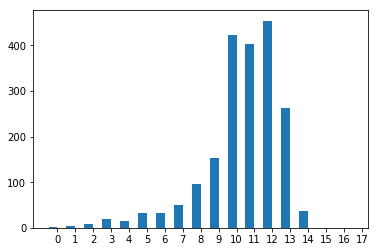

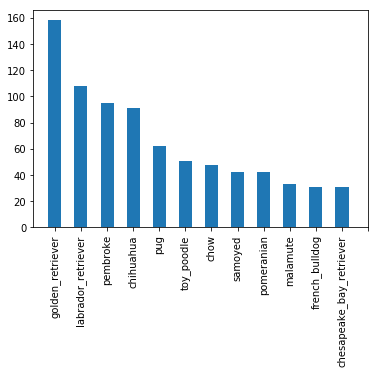

In [243]:
import matplotlib.pyplot as plt

#根据good_dogs展示一下狗狗们获得评分的分布图，因为没有评分的统计数据，所以用hist直方图来直接画rating_numerator
good_dogs.rating_numerator.value_counts()
plt.hist(good_dogs.rating_numerator[good_dogs.rating_numerator<18],bins=np.arange(0,18,step=1), align='left',width=0.5)
plt.xticks(np.arange(0,18,step=1))
#plt.bar(good_dogs.rating_numerator,good_dogs.rating_numerator.count())  

plt.savefig('dogs_rating.jpg')#先存再show才能保存住图片，否则show之后只能存到一张空白图
plt.show()



#显示主要品种狗狗们的数量情况，标签显示完整也费了一番功夫
dogs_species_clean
#划出来30~300只的狗狗们品种
x=np.arange(len(dogs_species_clean.dogs_count[(dogs_species_clean.dogs_count<300)&(dogs_species_clean.dogs_count>30)]))
y=dogs_species_clean.dogs_count[(dogs_species_clean.dogs_count<300)&(dogs_species_clean.dogs_count>30)].sort_values(ascending=False)
#print(type(y))
#labels=dogs_species_clean.dogs_count[(dogs_species_clean.dogs_count<300)&(dogs_species_clean.dogs_count>30).sort_values(ascending=False)]
labels=y.index #狗狗的品种名已经被我整成index了，这个要注意
#print(labels)

ax = plt.subplot(111)
plt.bar(x,y,width=0.5)
#set_xticks明确将标签放在什么位置，放多少个
ind = np.linspace(0,12,13)
ax.set_xticks(ind)
#set_xticklabels明确标签的内容
ax.set_xticklabels(labels,rotation=90,fontdict=None)

plt.savefig('dog_spacies.jpg')
plt.show()



#### 可视化结论

- 在基准分为10的情况下，普遍评分都在10+，狗狗们确实都是好狗狗。当然依然有忍心打到10以下的，看起来数量还不少
- 比较常见的狗狗有：'golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua','pug', 'toy_poodle', 'chow', 'Samoyed', 'Pomeranian', 'malamute','cocker_spaniel', 'French_bulldog', 'Chesapeake_Bay_retriever'